# Testing Algorithm


#### Further References:


In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys

import pm4py


sys.path.append("/workspaces/university-petri-nets/")

from backend.compositional_algorithm.compositional_algorithm import check_net_valid
from backend.compositional_algorithm.compositional_algorithm import discover
from backend.compositional_algorithm.compositional_algorithm import is_isomorphic
from backend.compositional_algorithm.compositional_algorithm import is_refinement
from backend.compositional_algorithm.interface_patterns.interface_patterns import (
    INTERFACE_PATTERNS,
)
from backend.compositional_algorithm.split_miner import split_miner
from backend.compositional_algorithm.transformations.transformations import (
    TRANSFORMATIONS,
)

#### 0. Input


In [21]:
log_path = "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_initial_log.xes"
algorithm = pm4py.discover_petri_net_inductive
algorithm2 = pm4py.discover_petri_net_alpha
algorithm3 = pm4py.discover_petri_net_heuristics
algorithm4 = split_miner


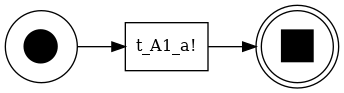

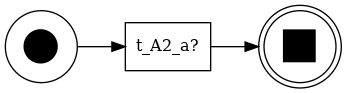

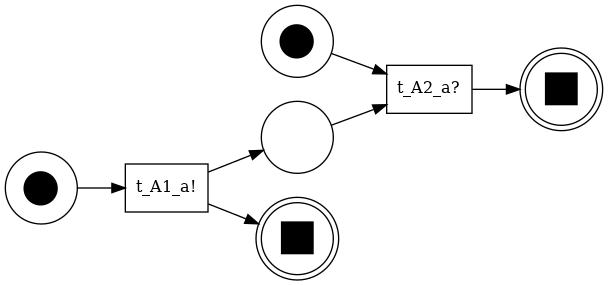

In [22]:
IP1 = INTERFACE_PATTERNS[0]()
ip1_net_a1, ip1_initial_marking_a1, ip1_final_marking_a1 = IP1.get_net("A1")
pm4py.view_petri_net(ip1_net_a1, ip1_initial_marking_a1, ip1_final_marking_a1)

ip1_net_a2, ip1_initial_marking_a2, ip1_final_marking_a2 = IP1.get_net("A2")
pm4py.view_petri_net(ip1_net_a2, ip1_initial_marking_a2, ip1_final_marking_a2)

ip1_net, ip1_initial_marking, ip1_final_marking = IP1.get_net("IP1")
pm4py.view_petri_net(ip1_net, ip1_initial_marking, ip1_final_marking)

#### 1. Directly Discover with the given input


parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

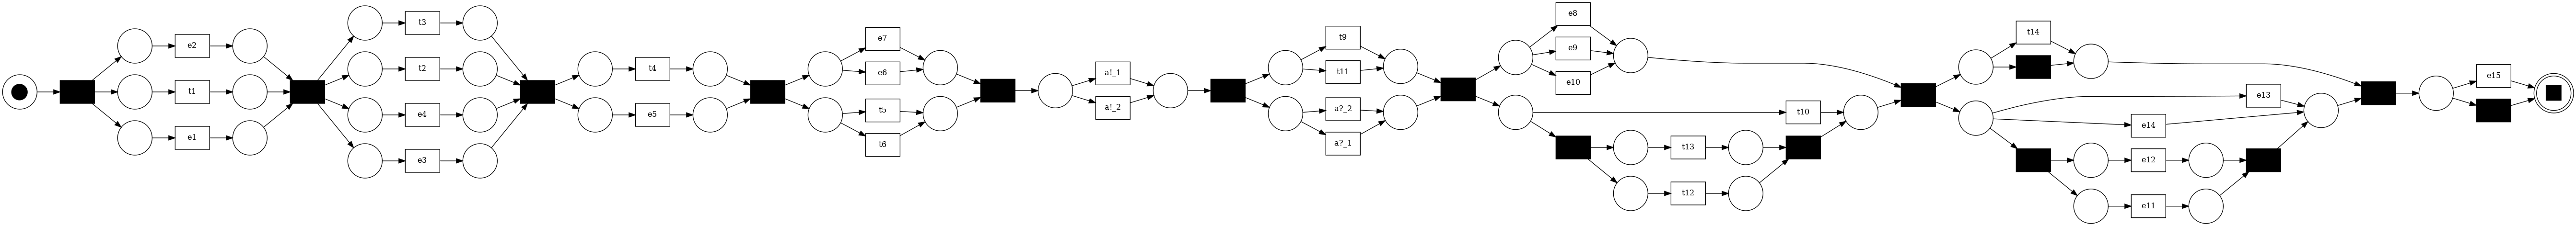

In [23]:
net, initial_marking, final_marking = discover(log_path, algorithm)
# net, initial_marking, final_marking = discover(log_path, algorithm4)  # noqa: ERA001
pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

#### 2. Check Net is valid


In [24]:
assert check_net_valid(net, net) is True

#### 3. Check Nets are equal


In [25]:
assert is_isomorphic(net, net) is True

#### 4. Check is Refinement


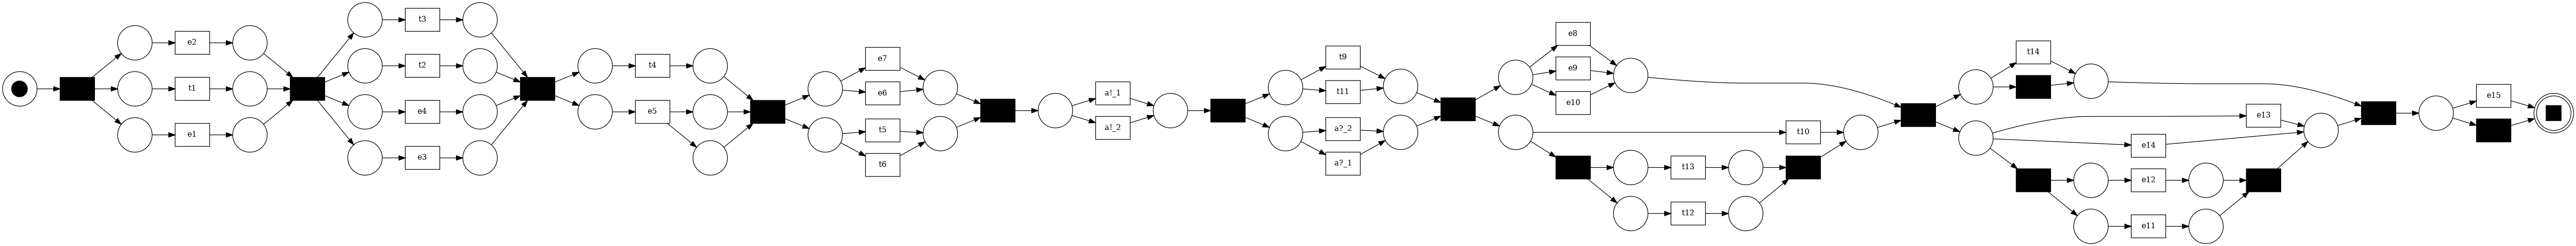

In [26]:
places = list(net.places)
P1 = TRANSFORMATIONS[0]
new_net = P1.refine(places[2], net)
pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

In [27]:
is_ref, path = is_refinement(net, net, TRANSFORMATIONS)
assert is_ref is True

In [28]:
is_ref, path = is_refinement(ip1_net_a1, ip1_net_a1, TRANSFORMATIONS)
assert is_ref is True

Processing Queue: 0it [00:00, ?it/s]

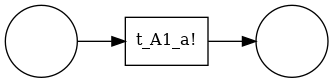

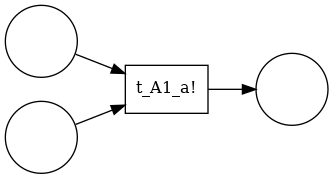

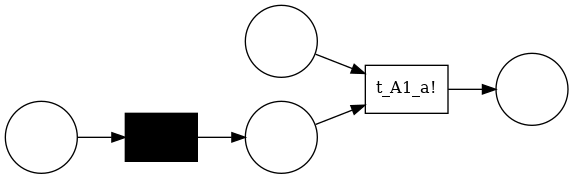

Processing Queue: 1it [00:01,  1.02s/it]


ValueError: Place p_A1_1 not found in Petri net.

In [30]:
is_ref, path = is_refinement(ip1_net_a1, net, TRANSFORMATIONS)
print(is_ref, path)  # noqa: T201
